**Brian Blaylock**  
*December 18, 2020*

# 🌎 Geostationary Projection in Cartopy


In [99]:
from datetime import datetime
import cartopy.crs as ccrs
import matplotlib.pyplot as plt


from goes2go.data import goes_latest, goes_nearesttime

from BB_maps.add_to_cartopy import common_features, pc

In [45]:
gcentral = goes_nearesttime(datetime(2017,10,5), satellite='G16', product='ABI')

 _______________________________
 | Satellite: noaa-goes16      |
 |   Product: ABI-L2-MCMIPC    |
 |    Domain: C                |
📦 Finished downloading [1] files to [/p/home/blaylock/data/noaa-goes16/ABI-L2-MCMIPC].                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [28]:
g17 = goes_latest(satellite='G17', product='ABI')
g16 = goes_latest(satellite='G16', product='ABI')

 _______________________________
 | Satellite: noaa-goes17      |
 |   Product: ABI-L2-MCMIPC    |
 |    Domain: C                |
📦 Finished downloading [1] files to [/p/home/blaylock/data/noaa-goes17/ABI-L2-MCMIPC].                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [29]:
g17

<xarray.Dataset>
Dimensions:                                 (band: 1, number_of_image_bounds: 2, number_of_time_bounds: 2, x: 2500, y: 1500)
Coordinates:
    t                                       datetime64[ns] ...
  * y                                       (y) float32 0.1282 ... 0.04427
  * x                                       (x) float32 -0.06997 ... 0.06997
    y_image                                 float32 ...
    x_image                                 float32 ...
    band_wavelength_C01                     (band) float32 ...
    band_wavelength_C02                     (band) float32 ...
    band_wavelength_C03                     (band) float32 ...
    band_wavelength_C04                     (band) float32 ...
    band_wavelength_C05                     (band) float32 ...
    band_wavelength_C06                     (band) float32 ...
    band_wavelength_C07                     (band) float32 ...
    band_wavelength_C08                     (band) float32 ...
    band_wavelength_C09                     (band) float32 ...
    band_wavelength_C10                     (band) float32 ...
    band_wavelength_C11                     (band) float32 ...
    band_wavelength_C12                     (band) float32 ...
    band_wavelength_C13                     (band) float32 ...
    band_wavelength_C14                     (band) float32 ...
    band_wavelength_C15                     (band) float32 ...
    band_wavelength_C16                     (band) float32 ...
    band_id_C01                             (band) int8 ...
    band_id_C02                             (band) int8 ...
    band_id_C03                             (band) int8 ...
    band_id_C04                             (band) int8 ...
    band_id_C05                             (band) int8 ...
    band_id_C06                             (band) int8 ...
    band_id_C07                             (band) int8 ...
    band_id_C08                             (band) int8 ...
    band_id_C09                             (band) int8 ...
    band_id_C10                             (band) int8 ...
    band_id_C11                             (band) int8 ...
    band_id_C12                             (band) int8 ...
    band_id_C13                             (band) int8 ...
    band_id_C14                             (band) int8 ...
    band_id_C15                             (band) int8 ...
    band_id_C16                             (band) int8 ...
    dataset_name                            <U74 'OR_ABI-L2-MCMIPC-M6_G17_s20...
    date_created                            <U22 '2020-12-18T23:44:07.6Z'
    time_coverage_start                     <U22 '2020-12-18T23:41:17.7Z'
    time_coverage_end                       <U22 '2020-12-18T23:43:55.0Z'
Dimensions without coordinates: band, number_of_image_bounds, number_of_time_bounds
Data variables:
    CMI_C01                                 (y, x) float32 ...
    DQF_C01                                 (y, x) float32 ...
    CMI_C02                                 (y, x) float32 ...
    DQF_C02                                 (y, x) float32 ...
    CMI_C03                                 (y, x) float32 ...
    DQF_C03                                 (y, x) float32 ...
    CMI_C04                                 (y, x) float32 ...
    DQF_C04                                 (y, x) float32 ...
    CMI_C05                                 (y, x) float32 ...
    DQF_C05                                 (y, x) float32 ...
    CMI_C06                                 (y, x) float32 ...
    DQF_C06                                 (y, x) float32 ...
    CMI_C07                                 (y, x) float32 ...
    DQF_C07                                 (y, x) float32 ...
    CMI_C08                                 (y, x) float32 ...
    DQF_C08                                 (y, x) float32 ...
    CMI_C09                                 (y, x) float32 ...
    DQF_C09                                 (y, x) float32 ...
    CMI_C10  

In [30]:
g17.nominal_satellite_subpoint_lon

<xarray.DataArray 'nominal_satellite_subpoint_lon' ()>
array(-137.199997)
Coordinates:
    t                    datetime64[ns] 2020-12-18T23:42:36.439340928
    y_image              float32 0.08624
    x_image              float32 0.0
    dataset_name         <U74 'OR_ABI-L2-MCMIPC-M6_G17_s20203532341177_e20203...
    date_created         <U22 '2020-12-18T23:44:07.6Z'
    time_coverage_start  <U22 '2020-12-18T23:41:17.7Z'
    time_coverage_end    <U22 '2020-12-18T23:43:55.0Z'
Attributes:
    long_name:      nominal satellite subpoint longitude (platform longitude)
    standard_name:  longitude
    units:          degrees_east

In [31]:
geo17 = ccrs.Geostationary(
    central_longitude=g17.nominal_satellite_subpoint_lon.item(),
    satellite_height=g17.nominal_satellite_height.item()*1000
)
geo17

In [32]:
geo16 = ccrs.Geostationary(
    central_longitude=g16.nominal_satellite_subpoint_lon.item(),
    satellite_height=g16.nominal_satellite_height.item()*1000
)
geo16

In [47]:
geocentral = ccrs.Geostationary(
    central_longitude=gcentral.nominal_satellite_subpoint_lon.item(),
    satellite_height=gcentral.nominal_satellite_height.item()*1000
)
geocentral

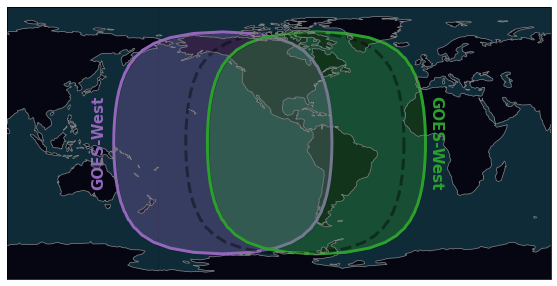

In [101]:
ax = common_features(OCEAN=True, LAND=True, projection=ccrs.PlateCarree(central_longitude=-100), figsize=[10,5], dark_theme=True)

# I have to use the buffer to reduce the geo boundary because cartopy doesn't
# draw an exact boundary. For this visualization purpose, this is OK.

# Draw boundary of GOES17
ax.add_geometries([geo17.domain.buffer(-70_000)], crs=geo17,
                   facecolor='tab:purple', edgecolor='k', alpha=0.3, linewidth=3)
ax.add_geometries([geo17.domain.buffer(-70_000)], crs=geo17,
                   facecolor='none', edgecolor='tab:purple', alpha=1, linewidth=3)

# Draw boundary of GOES16
ax.add_geometries([geo16.domain.buffer(-70_000)], crs=geo16,
                   facecolor='tab:green', edgecolor='k', alpha=0.3, linewidth=3)
ax.add_geometries([geo16.domain.buffer(-70_000)], crs=geo16,
                   facecolor='none', edgecolor='tab:green', alpha=1, linewidth=3)

# Draw boundary of GOES-Central (test phase)
ax.add_geometries([geocentral.domain.buffer(-70_000)], crs=geocentral,
                   facecolor='none', edgecolor='k', alpha=.4, linewidth=3, linestyle='--')


ax.text(g17.geospatial_lat_lon_extent.geospatial_westbound_longitude-40,
        g17.geospatial_lat_lon_extent.geospatial_lat_nadir,
        'GOES-West', transform=pc,
       rotation=90, va='center', fontsize=15, color='tab:purple', fontweight='bold')

ax.text(g16.geospatial_lat_lon_extent.geospatial_eastbound_longitude+52,
        g16.geospatial_lat_lon_extent.geospatial_lat_nadir,
        'GOES-West', transform=pc,
       rotation=-90, va='center', fontsize=15, color='tab:green', fontweight='bold')

plt.savefig('../images/field-of-view.png')

In [77]:
g17.

(175.62358, 0.0)

In [104]:
geo16.proj4_params

{'ellps': 'WGS84',
 'proj': 'geos',
 'lon_0': -75.19999694824219,
 'lat_0': 0.0,
 'h': 35786023.4375,
 'x_0': 0,
 'y_0': 0,
 'units': 'm',
 'sweep': 'y'}